In [1]:
import pandas as pd
import networkx as nx
import openpyxl
import distance
import matplotlib.pyplot as plt
import gseapy as gp
from gseapy import Biomart
bm = Biomart()
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import gseapy as gp
import numpy as np  
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler



/Users/elisa/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
import warnings

### Before run the next cell, make sure to have runned the file "databases-1.ipynb, and also the file "PE_roject_elisa".

In [3]:

# Disgenet
disgenet = pd.read_excel("/Users/elisa/Desktop/Tesi/PROGETTO/Disease_Disease_summary.xlsx")

# kegg
kegg = pd.read_excel("/Users/elisa/Desktop/Tesi/PROGETTO/Risultati_clustering/KEGG_2021_Human_Disease_Disease_Intersections.xlsx")

# reactome
reactome = pd.read_excel("/Users/elisa/Desktop/Tesi/PROGETTO/Risultati_clustering/Reactome_2022_Disease_Disease_Intersections.xlsx")

# go biological process
go_bp = pd.read_excel("/Users/elisa/Desktop/Tesi/PROGETTO/Risultati_clustering/GO_Biological_Process_2021_Disease_Disease_Intersections.xlsx")

# go molecular function
go_mf = pd.read_excel("/Users/elisa/Desktop/Tesi/PROGETTO/Risultati_clustering/GO_Molecular_Function_2021_Disease_Disease_Intersections.xlsx")

# go cellular component
go_cc = pd.read_excel("/Users/elisa/Desktop/Tesi/PROGETTO/Risultati_clustering/GO_Cellular_Component_Disease_Disease_Intersections.xlsx")



In [4]:
 # take just the column of the intersection over min
disgenet_min = disgenet[['Intersection over min %']].rename(columns={"Intersection over min %": "DisGeNET"})
kegg_min = kegg[['Intersection over min % OD ∩ RD']].rename(columns={"Intersection over min % OD ∩ RD": "KEGG"})
reactome_min = reactome[['Intersection over min % OD ∩ RD']].rename(columns={"Intersection over min % OD ∩ RD": "Reactome"})
go_bp_min = go_bp[['Intersection over min % OD ∩ RD']].rename(columns={"Intersection over min % OD ∩ RD": "GO Biological Process"})
go_mf_min= go_mf[['Intersection over min % OD ∩ RD']].rename(columns={"Intersection over min % OD ∩ RD": "GO Molecular Function"})
go_cc_min = go_cc[['Intersection over min % OD ∩ RD']].rename(columns={"Intersection over min % OD ∩ RD": "GO Cellular Component"})


#upload Disease Disease file
disease_disease = pd.read_excel("/Users/elisa/Desktop/Tesi/PROGETTO/Disease_Disease_summary.xlsx")

# Concatena tutti i DataFrame
df = pd.concat([kegg_min, reactome_min, go_bp_min, go_mf_min, go_cc_min, disgenet_min], axis=1)

df.index = disease_disease['Disease - Disease']

#rename the index column 
df.index.name = 'Diseases'

output_file_path = "/Users/elisa/Desktop/Tesi/PROGETTO/Risultati_clustering/Intersection_over_min_ratios.xlsx"
df.to_excel(output_file_path)

In [5]:
df

,KEGG,Reactome,GO Biological Process,GO Molecular Function,GO Cellular Component,DisGeNET
Diseases,,,,,,
Colorectal carcinoma - Human Immunodeficiency Virus,89.552239,51.127820,53.433476,22.222222,71.428571,10.968661
Colorectal carcinoma - Acquired Immunodeficiency Syndrome,67.910448,24.060150,37.768240,11.111111,28.571429,9.465021
Idiopathic intracranial hypertension - Alopecia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Angina pectoris - Erectile dysfunction,55.555556,40.000000,45.316456,38.235294,0.000000,40.000000
Nausea and vomiting - Erythema nodosum leprosum,81.609195,26.250000,37.668161,20.000000,50.000000,13.043478
Nausea and vomiting - Multiple myeloma,73.770492,30.000000,35.625000,30.000000,40.000000,14.285714
Generalized Osteoarthritis - Multiple adenomatous polyps,62.727273,27.619048,39.171975,6.250000,42.857143,4.651163
Rheumatoid arthritis - Multiple adenomatous polyps,44.791667,16.279070,32.165605,25.000000,0.000000,6.976744
Parkinson disease - Attention deficit hyperactivity disorder,33.333333,10.000000,31.847134,10.714286,35.000000,8.333333


In [6]:
#df.applymap(lambda x: str.format("{:0_.2f}", x).replace('.', ',').replace('_', '.')).to_latex('table.tex')


/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


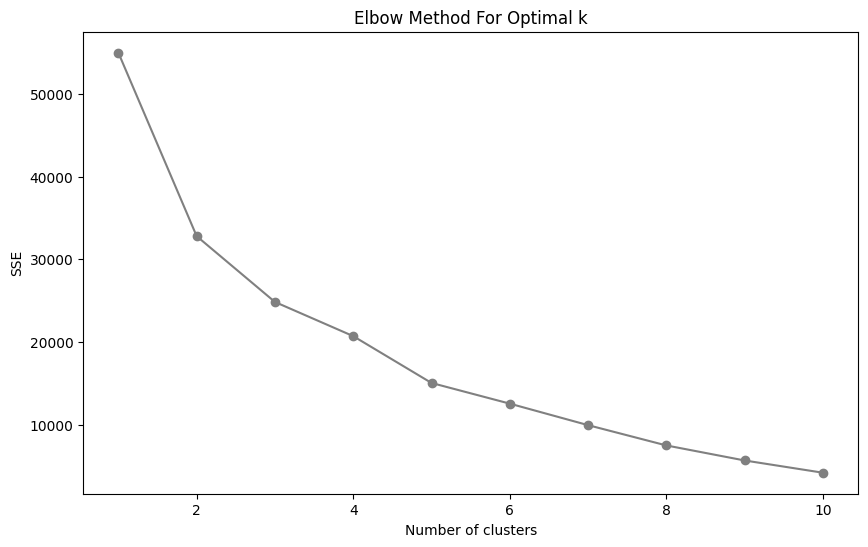

In [7]:
# perform the clustering wuth the df obtained with all the columns

# relevant columns for clustering
data_numeric = df[['KEGG', 'Reactome', 'GO Biological Process', 'GO Molecular Function', 'GO Cellular Component', 'DisGeNET']]
# Determina il numero ottimale di cluster
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_numeric)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o', color ="gray")
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


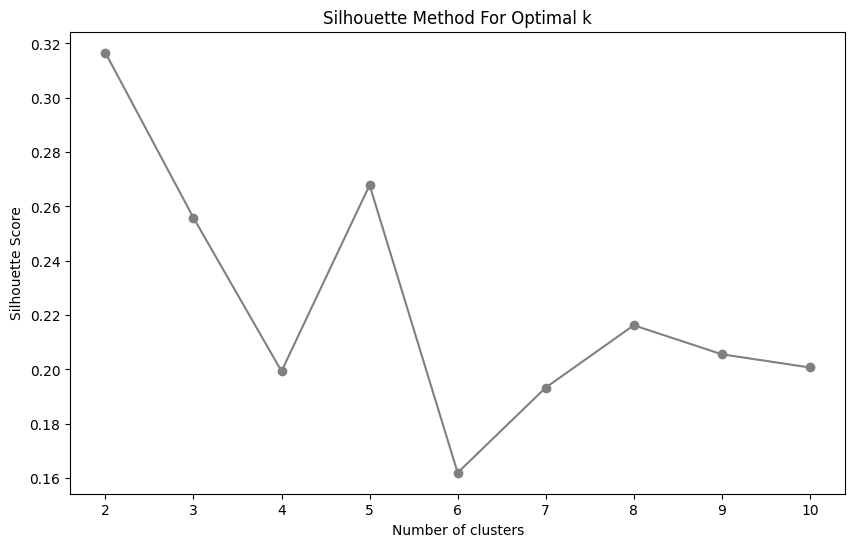

In [9]:
silhouette_scores = []
K = range(2, 11) 

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_numeric)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(data_numeric, labels))

# Traccia il metodo della silhouette
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, marker='o', color ="gray")
plt.title('Silhouette Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [10]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# KMeans K=2

In [11]:
# optimal number of clusters
optimal_k = 2

# Esegui il clustering con KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df['Cluster'] = kmeans.fit_predict(data_numeric)

# Percorso di base per salvare i risultati
base_path = "/Users/elisa/Desktop/Tesi/PROGETTO/Risultati_clustering/INTERSECTION_OVER_MIN/"

# Nome della cartella basato sul numero di cluster
cluster_folder = f"K_MEANS_K_{optimal_k}"

# Percorso completo della cartella
full_path = os.path.join(base_path, cluster_folder)

# Crea la cartella se non esiste
os.makedirs(full_path, exist_ok=True)

# Percorso del file Excel
output_file_path_clusters = os.path.join(full_path, f"df_KMEANS_K_{optimal_k}.xlsx")

# Salva il DataFrame come file Excel nella nuova cartella
df.to_excel(output_file_path_clusters, index=True)

# Visualizza il DataFrame
df

/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,KEGG,Reactome,GO Biological Process,GO Molecular Function,GO Cellular Component,DisGeNET,Cluster
Diseases,,,,,,,
Colorectal carcinoma - Human Immunodeficiency Virus,89.552239,51.127820,53.433476,22.222222,71.428571,10.968661,0
Colorectal carcinoma - Acquired Immunodeficiency Syndrome,67.910448,24.060150,37.768240,11.111111,28.571429,9.465021,1
Idiopathic intracranial hypertension - Alopecia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
Angina pectoris - Erectile dysfunction,55.555556,40.000000,45.316456,38.235294,0.000000,40.000000,0
Nausea and vomiting - Erythema nodosum leprosum,81.609195,26.250000,37.668161,20.000000,50.000000,13.043478,0
Nausea and vomiting - Multiple myeloma,73.770492,30.000000,35.625000,30.000000,40.000000,14.285714,0
Generalized Osteoarthritis - Multiple adenomatous polyps,62.727273,27.619048,39.171975,6.250000,42.857143,4.651163,1
Rheumatoid arthritis - Multiple adenomatous polyps,44.791667,16.279070,32.165605,25.000000,0.000000,6.976744,1
Parkinson disease - Attention deficit hyperactivity disorder,33.333333,10.000000,31.847134,10.714286,35.000000,8.333333,1


In [12]:
# Definizione della funzione per creare i dati clusterizzati per ciascun database
def create_clustered_data(df, db_name):
    clustered_data = []
    
    for cluster_id in range(optimal_k):
        cluster = df[df['Cluster'] == cluster_id]
        cluster_dict = {
            'Cluster': cluster_id,
            'Diseases': cluster.index.tolist(),
            db_name: cluster[db_name].tolist()
        }
        clustered_data.append(cluster_dict)
    
    clustered_df = pd.DataFrame(clustered_data)
    return clustered_df

##################################################### Numero ottimale di cluster ATTENZIONE ########################################################
optimal_k = 2

# Esegui il clustering con KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df['Cluster'] = kmeans.fit_predict(data_numeric)

# Percorso di base per salvare i risultati
base_path = "/Users/elisa/Desktop/Tesi/PROGETTO/Risultati_clustering/INTERSECTION_OVER_MIN/"
cluster_folder = f"K_MEANS_K_{optimal_k}"
full_path = os.path.join(base_path, cluster_folder)

# Crea la cartella se non esiste
os.makedirs(full_path, exist_ok=True)

# Genera i dati clusterizzati per ogni database
clustered_data_kegg = create_clustered_data(df, 'KEGG')
clustered_data_reactome = create_clustered_data(df, 'Reactome')
clustered_data_gobp = create_clustered_data(df, 'GO Biological Process')
clustered_data_gomf = create_clustered_data(df, 'GO Molecular Function')
clustered_data_gocc = create_clustered_data(df, 'GO Cellular Component')
clustered_data_disgenet = create_clustered_data(df, 'DisGeNET')

# Salva i risultati in file Excel nella cartella appropriata
clustered_data_kegg.to_excel(os.path.join(full_path, "Clustering_Results_KEGG.xlsx"), index=False)
clustered_data_reactome.to_excel(os.path.join(full_path, "Clustering_Results_Reactome.xlsx"), index=False)
clustered_data_gobp.to_excel(os.path.join(full_path, "Clustering_Results_GOBP.xlsx"), index=False)
clustered_data_gomf.to_excel(os.path.join(full_path, "Clustering_Results_GOMF.xlsx"), index=False)
clustered_data_gocc.to_excel(os.path.join(full_path, "Clustering_Results_GOCC.xlsx"), index=False)
clustered_data_disgenet.to_excel(os.path.join(full_path, "Clustering_Results_DisGeNET.xlsx"), index=False)

# Visualizza i risultati (opzionale, solo per verifica)
print("Risultati del clustering salvati con successo.")

Risultati del clustering salvati con successo.


/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


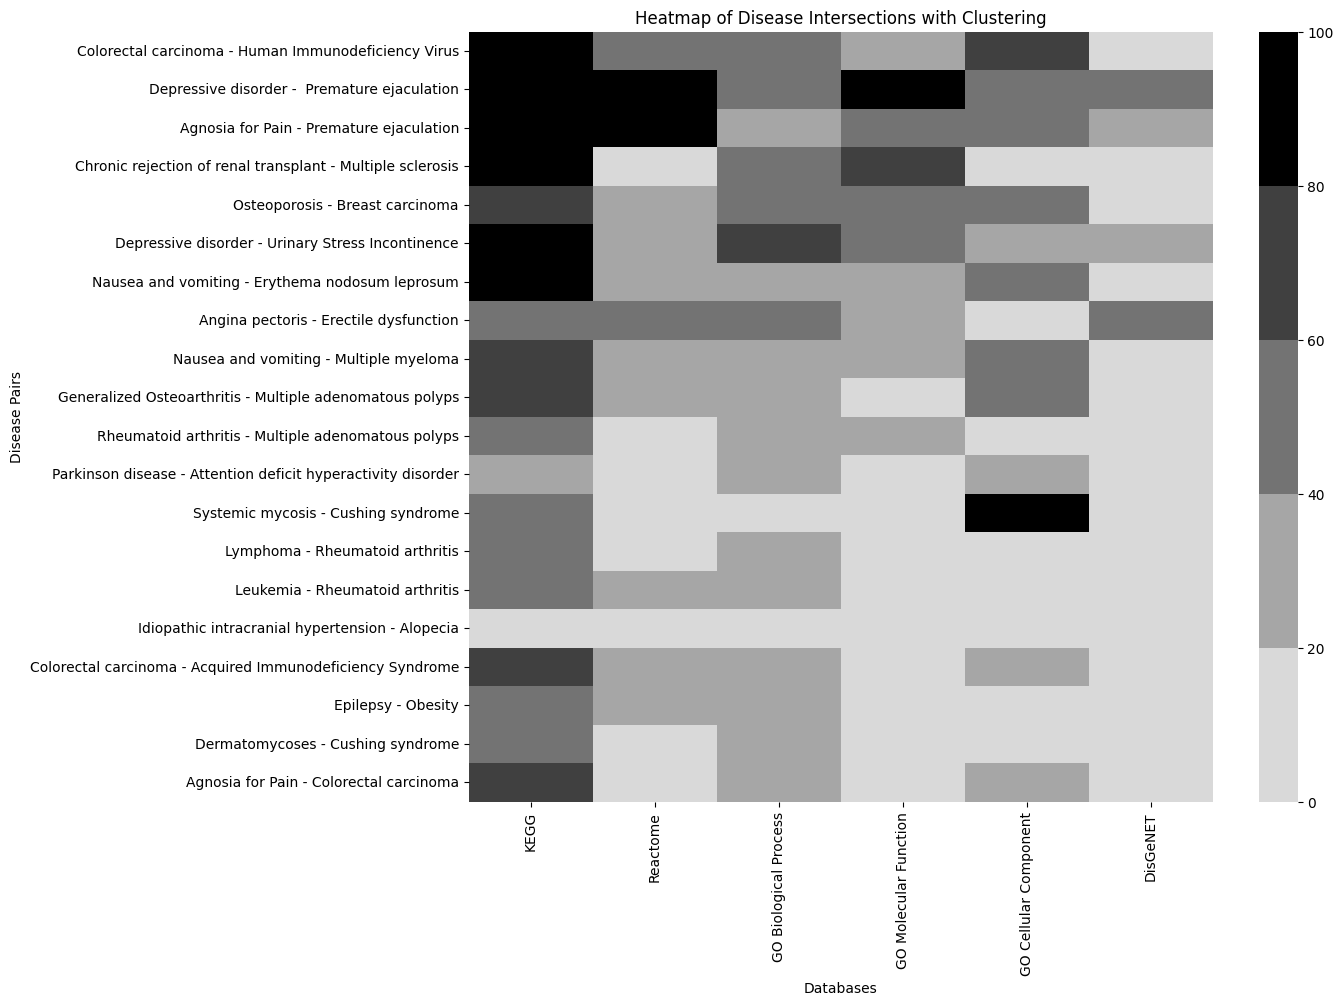

In [13]:

# Ordina i dati per cluster
df_sorted = df.sort_values('Cluster')

# Percorso di base per salvare i risultati
base_path = "/Users/elisa/Desktop/Tesi/PROGETTO/Risultati_clustering/INTERSECTION_OVER_MIN/"
cluster_folder = f"K_MEANS_K_{optimal_k}"
full_path = os.path.join(base_path, cluster_folder)

# Crea la cartella se non esiste
os.makedirs(full_path, exist_ok=True)

# Creazione della Heatmap
plt.figure(figsize=(12, 10))
gray_palette = ['#d9d9d9', '#a6a6a6', '#737373', '#404040', '#000000']
sns.heatmap(df_sorted[['KEGG', 'Reactome', 'GO Biological Process', 'GO Molecular Function', 'GO Cellular Component', 'DisGeNET']], 
            cmap=gray_palette, cbar=True)

plt.yticks(ticks=np.arange(df_sorted.shape[0]) + 0.5, labels=df_sorted.index, rotation=0)
plt.title('Heatmap of Disease Intersections with Clustering')
plt.xlabel('Databases')
plt.ylabel('Disease Pairs')

# Salva l'immagine della heatmap
output_file_path_heatmap = os.path.join(full_path, "Heatmap.png")
plt.savefig(output_file_path_heatmap, dpi=300, bbox_inches='tight')

# Mostra la heatmap
plt.show()



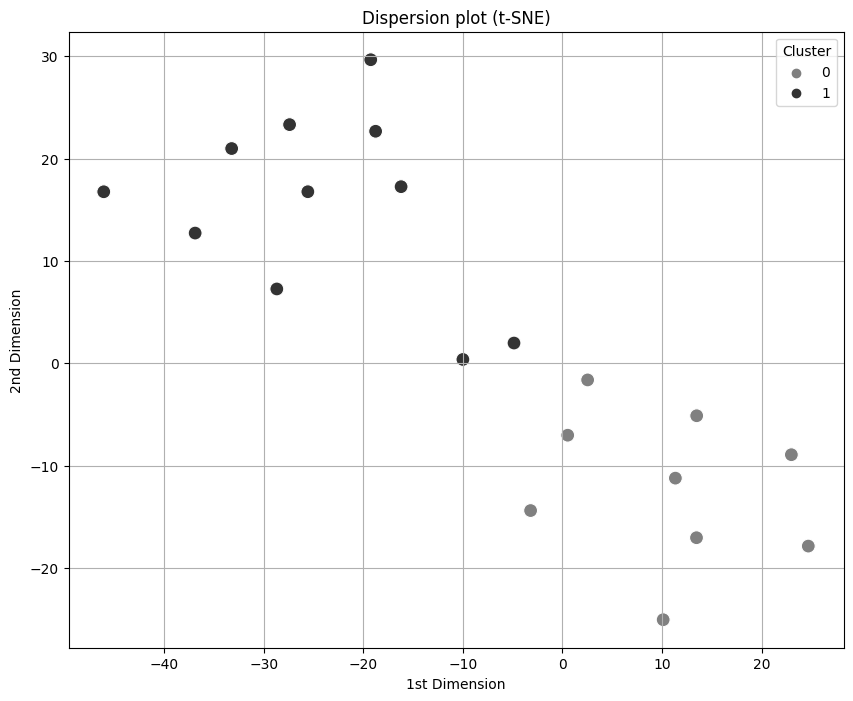

,Dimension1,Dimension2,Cluster
Diseases,,,
Colorectal carcinoma - Human Immunodeficiency Virus,13.473182,-5.118703,0
Colorectal carcinoma - Acquired Immunodeficiency Syndrome,-4.867713,1.983461,1
Idiopathic intracranial hypertension - Alopecia,-28.679794,7.266149,1
Angina pectoris - Erectile dysfunction,10.107781,-25.044004,0
Nausea and vomiting - Erythema nodosum leprosum,2.523461,-1.620019,0
Nausea and vomiting - Multiple myeloma,0.523399,-7.019492,0
Generalized Osteoarthritis - Multiple adenomatous polyps,-9.997544,0.380630,1
Rheumatoid arthritis - Multiple adenomatous polyps,-18.762121,22.672062,1
Parkinson disease - Attention deficit hyperactivity disorder,-36.881012,12.726803,1


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Supponiamo che 'df' sia il tuo DataFrame con i dati e la colonna 'Cluster'
data_numeric = df.drop(columns=['Cluster'])  # Escludi la colonna Cluster
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Esegui t-SNE per ridurre a 2 dimensioni
tsne = TSNE(n_components=2, perplexity=5, random_state=0)
data_tsne = tsne.fit_transform(data_scaled)

# Crea un DataFrame con i risultati di t-SNE
df_tsne = pd.DataFrame(data_tsne, columns=['Dimension1', 'Dimension2'], index=df.index)
df_tsne['Cluster'] = df['Cluster']

# Definisci una palette di colori grigi chiaro e scuro
palette = {0: '#808080', 1: '#333333'}

# Crea il grafico di dispersione
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimension1', y='Dimension2', hue='Cluster', data=df_tsne, palette=palette, s=100)
plt.title('Dispersion plot (t-SNE)')
plt.xlabel('1st Dimension')
plt.ylabel('2nd Dimension')
plt.grid(True)
plt.show()
df_tsne


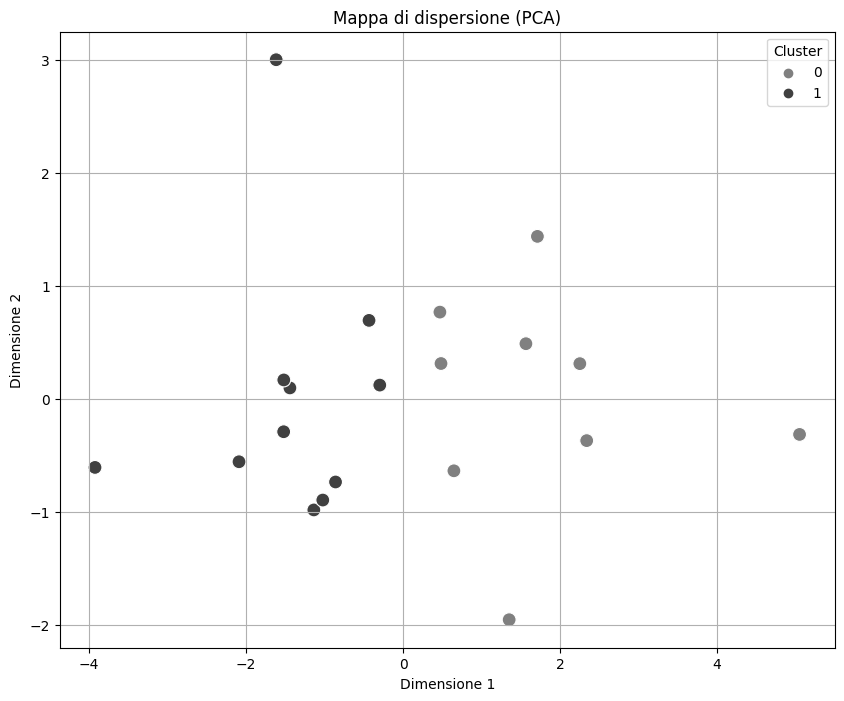

,Dimension1,Dimension2,Cluster
Diseases,,,
Colorectal carcinoma - Human Immunodeficiency Virus,1.710635,1.434964,0
Colorectal carcinoma - Acquired Immunodeficiency Syndrome,-0.296899,0.119053,1
Idiopathic intracranial hypertension - Alopecia,-3.923832,-0.609477,1
Angina pectoris - Erectile dysfunction,1.350698,-1.957170,0
Nausea and vomiting - Erythema nodosum leprosum,0.468923,0.764918,0
Nausea and vomiting - Multiple myeloma,0.482758,0.309911,0
Generalized Osteoarthritis - Multiple adenomatous polyps,-0.434011,0.691635,1
Rheumatoid arthritis - Multiple adenomatous polyps,-1.136605,-0.985755,1
Parkinson disease - Attention deficit hyperactivity disorder,-1.441447,0.093868,1


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import os

# Supponiamo che 'df' sia il tuo DataFrame con i dati e la colonna 'Cluster'
data_numeric = df.drop(columns=['Cluster'])  # Escludi la colonna Cluster
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Esegui PCA per ridurre a 2 dimensioni
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Crea un DataFrame con i risultati di PCA
df_pca = pd.DataFrame(data_pca, columns=['Dimension1', 'Dimension2'], index=df.index)
df_pca['Cluster'] = df['Cluster']

# Definisci una palette di colori grigio medio e grigio scuro
palette = {0: '#808080', 1: '#404040'}

# Crea il grafico di dispersione
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimension1', y='Dimension2', hue='Cluster', data=df_pca, palette=palette, s=100)
plt.title('Mappa di dispersione (PCA)')
plt.xlabel('Dimensione 1')
plt.ylabel('Dimensione 2')
plt.grid(True)
plt.show()

df_pca


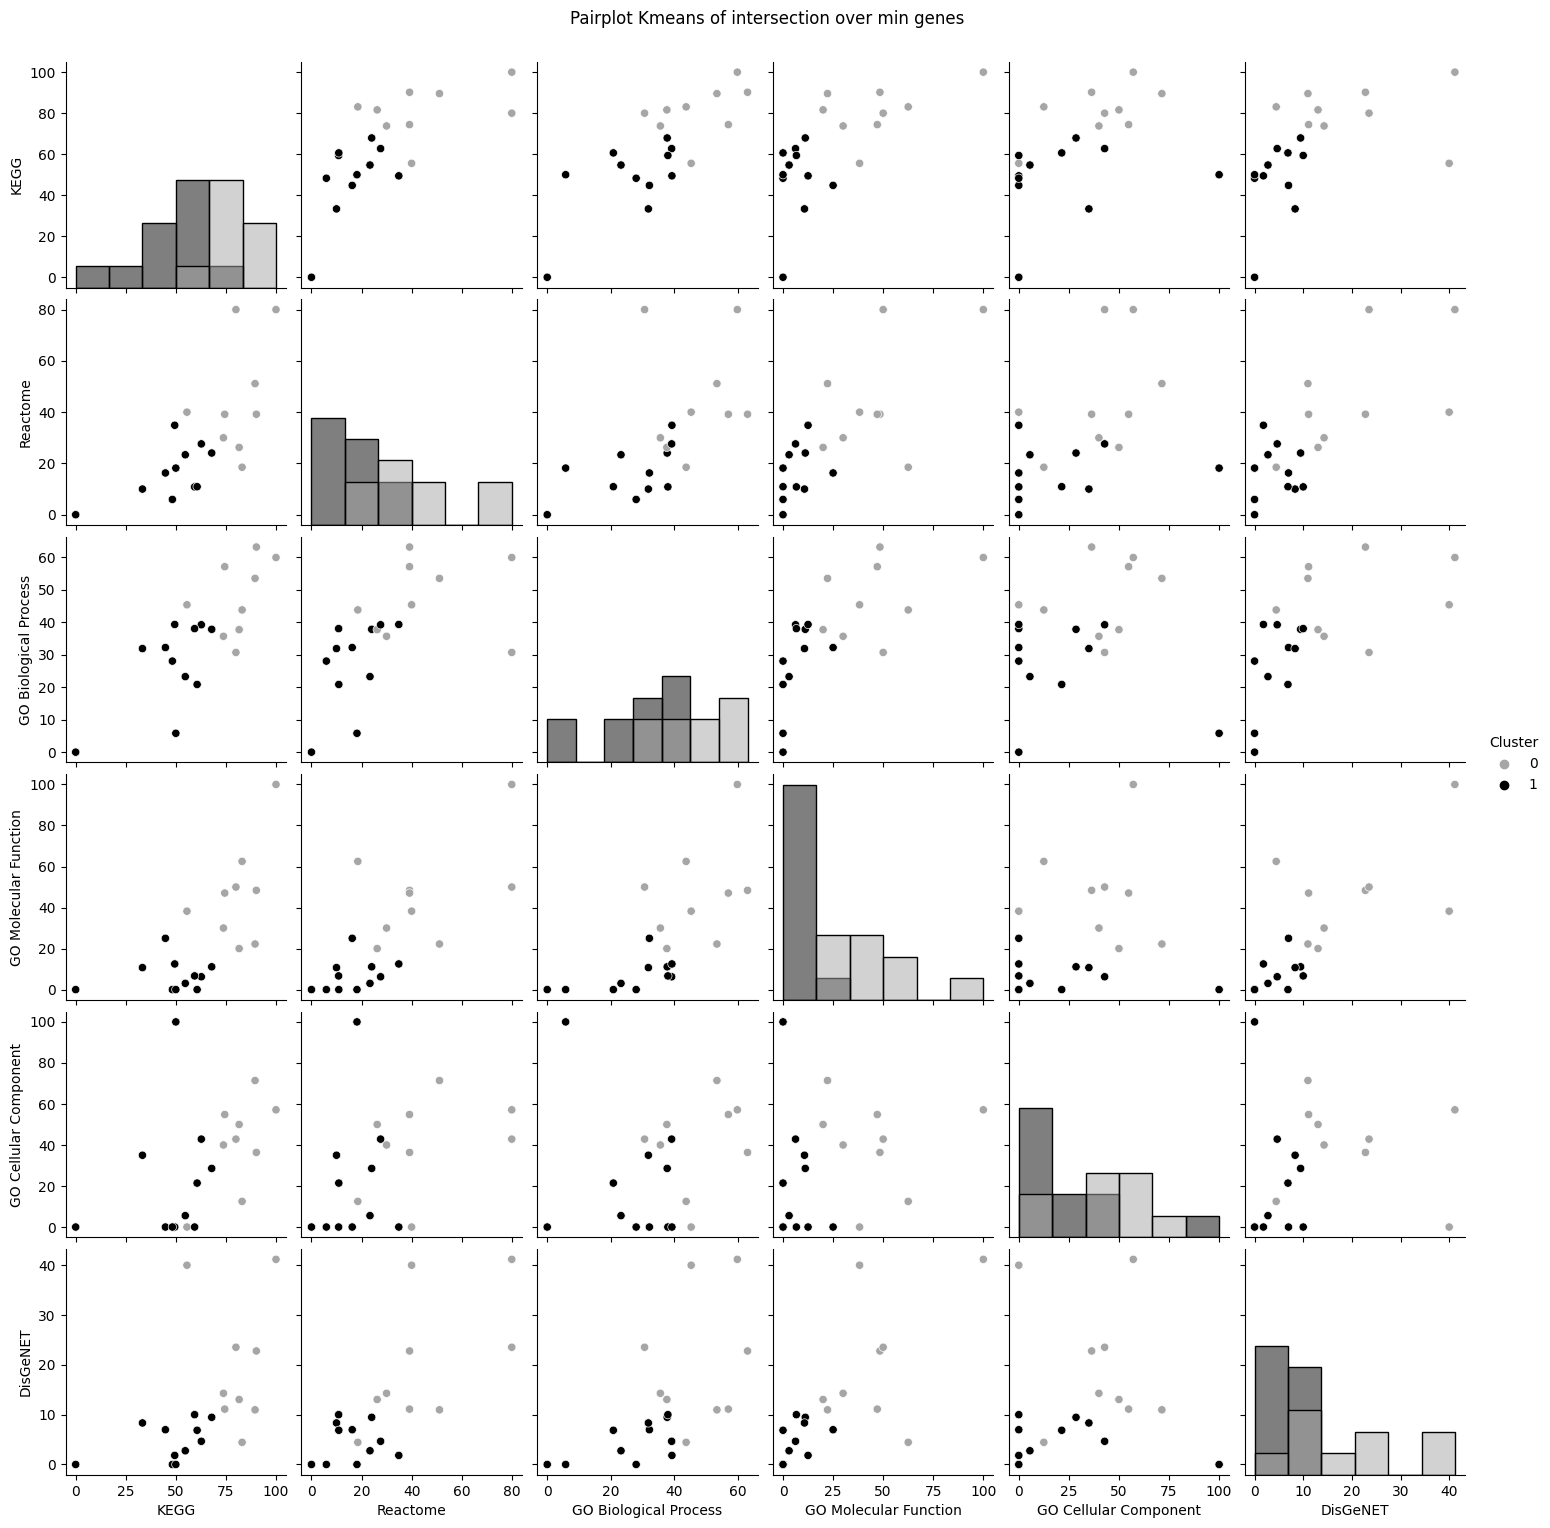

In [16]:
# Percorso di base per salvare i risultati
base_path = "/Users/elisa/Desktop/Tesi/PROGETTO/Risultati_clustering/INTERSECTION_OVER_MIN/"
cluster_folder = f"K_MEANS_K_{optimal_k}"
full_path = os.path.join(base_path, cluster_folder)

# Crea la cartella se non esiste
os.makedirs(full_path, exist_ok=True)

# Pairplot of intersection over min ratios
gray_palette = ['#a6a6a6', '#000000']
sns.pairplot(df, vars=['KEGG', 'Reactome', 'GO Biological Process', 'GO Molecular Function', 'GO Cellular Component', 'DisGeNET'], 
             hue='Cluster', palette=gray_palette, diag_kind='hist')
plt.suptitle('Pairplot Kmeans of intersection over min genes', y=1.02)

# Salva il pairplot
output_file_path_pairplot = os.path.join(full_path, "Pairplot.png")
plt.savefig(output_file_path_pairplot, dpi=300, bbox_inches='tight')

# Mostra il pairplot
plt.show()

# K-Means K = 2, without "DisGeNet"


In [17]:
# take just the column of the intersection over min
kegg_min = kegg[['Intersection over min % OD ∩ RD']].rename(columns={"Intersection over min % OD ∩ RD": "KEGG"})
reactome_min = reactome[['Intersection over min % OD ∩ RD']].rename(columns={"Intersection over min % OD ∩ RD": "Reactome"})
go_bp_min = go_bp[['Intersection over min % OD ∩ RD']].rename(columns={"Intersection over min % OD ∩ RD": "GO Biological Process"})
go_mf_min= go_mf[['Intersection over min % OD ∩ RD']].rename(columns={"Intersection over min % OD ∩ RD": "GO Molecular Function"})
go_cc_min = go_cc[['Intersection over min % OD ∩ RD']].rename(columns={"Intersection over min % OD ∩ RD": "GO Cellular Component"})


#upload Disease Disease file
disease_disease = pd.read_excel("/Users/elisa/Desktop/Tesi/PROGETTO/Disease_Disease_summary.xlsx")

# Concatena tutti i DataFrame
df = pd.concat([kegg_min, reactome_min, go_bp_min, go_mf_min, go_cc_min], axis=1)

df.index = disease_disease['Disease - Disease']

#rename the index column 
df.index.name = 'Diseases'


In [18]:
df

,KEGG,Reactome,GO Biological Process,GO Molecular Function,GO Cellular Component
Diseases,,,,,
Colorectal carcinoma - Human Immunodeficiency Virus,89.552239,51.127820,53.433476,22.222222,71.428571
Colorectal carcinoma - Acquired Immunodeficiency Syndrome,67.910448,24.060150,37.768240,11.111111,28.571429
Idiopathic intracranial hypertension - Alopecia,0.000000,0.000000,0.000000,0.000000,0.000000
Angina pectoris - Erectile dysfunction,55.555556,40.000000,45.316456,38.235294,0.000000
Nausea and vomiting - Erythema nodosum leprosum,81.609195,26.250000,37.668161,20.000000,50.000000
Nausea and vomiting - Multiple myeloma,73.770492,30.000000,35.625000,30.000000,40.000000
Generalized Osteoarthritis - Multiple adenomatous polyps,62.727273,27.619048,39.171975,6.250000,42.857143
Rheumatoid arthritis - Multiple adenomatous polyps,44.791667,16.279070,32.165605,25.000000,0.000000
Parkinson disease - Attention deficit hyperactivity disorder,33.333333,10.000000,31.847134,10.714286,35.000000


/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


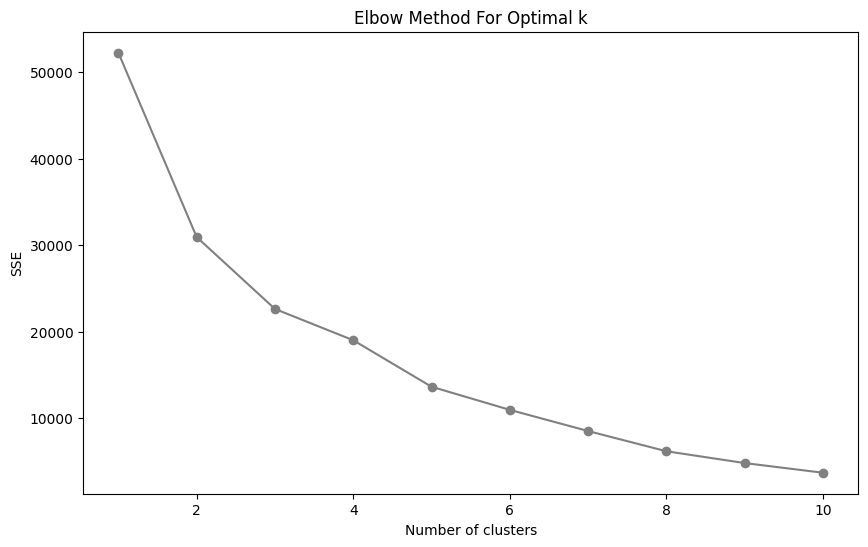

In [19]:
# perform the clustering with the df obtained with all the columns

# relevant columns for clustering
data_numeric = df[['KEGG', 'Reactome', 'GO Biological Process', 'GO Molecular Function', 'GO Cellular Component']]
# Determina il numero ottimale di cluster
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_numeric)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o', color ="gray")
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


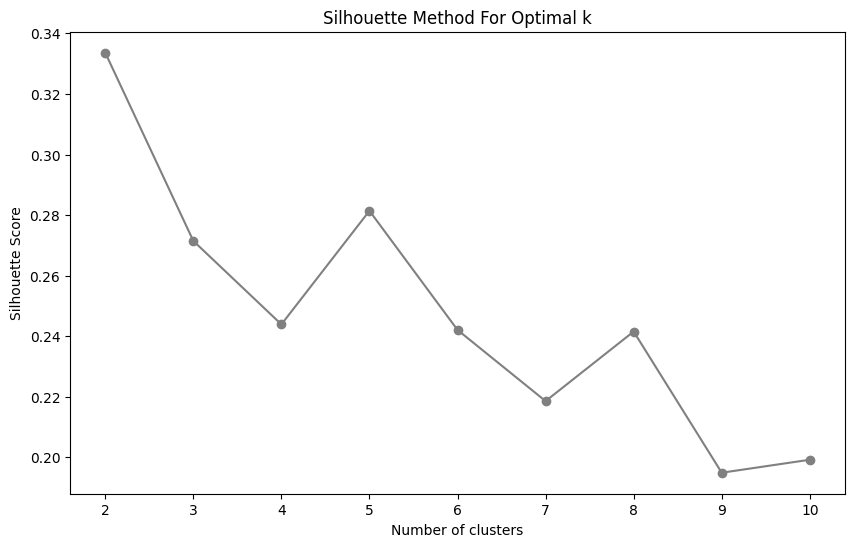

In [21]:
silhouette_scores = []
K = range(2, 11) 

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_numeric)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(data_numeric, labels))

# Traccia il metodo della silhouette
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, marker='o', color ="gray")
plt.title('Silhouette Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [22]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [23]:
# optimal number of clusters
optimal_k = 2

# Esegui il clustering con KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df['Cluster'] = kmeans.fit_predict(data_numeric)

# Percorso di base per salvare i risultati
base_path = "/Users/elisa/Desktop/Tesi/PROGETTO/Risultati_clustering/INTERSECTION_OVER_MIN/"

# Nome della cartella basato sul numero di cluster
cluster_folder = f"K_MEANS_K_{optimal_k}"

# Percorso completo della cartella
full_path = os.path.join(base_path, cluster_folder)

# Crea la cartella se non esiste
os.makedirs(full_path, exist_ok=True)

# Percorso del file Excel
output_file_path_clusters = os.path.join(full_path, f"df_KMEANS_K_{optimal_k}.xlsx")

# Salva il DataFrame come file Excel nella nuova cartella
df.to_excel(output_file_path_clusters, index=True)

# Visualizza il DataFrame
df

/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,KEGG,Reactome,GO Biological Process,GO Molecular Function,GO Cellular Component,Cluster
Diseases,,,,,,
Colorectal carcinoma - Human Immunodeficiency Virus,89.552239,51.127820,53.433476,22.222222,71.428571,0
Colorectal carcinoma - Acquired Immunodeficiency Syndrome,67.910448,24.060150,37.768240,11.111111,28.571429,1
Idiopathic intracranial hypertension - Alopecia,0.000000,0.000000,0.000000,0.000000,0.000000,1
Angina pectoris - Erectile dysfunction,55.555556,40.000000,45.316456,38.235294,0.000000,1
Nausea and vomiting - Erythema nodosum leprosum,81.609195,26.250000,37.668161,20.000000,50.000000,0
Nausea and vomiting - Multiple myeloma,73.770492,30.000000,35.625000,30.000000,40.000000,0
Generalized Osteoarthritis - Multiple adenomatous polyps,62.727273,27.619048,39.171975,6.250000,42.857143,1
Rheumatoid arthritis - Multiple adenomatous polyps,44.791667,16.279070,32.165605,25.000000,0.000000,1
Parkinson disease - Attention deficit hyperactivity disorder,33.333333,10.000000,31.847134,10.714286,35.000000,1


In [24]:
# Definizione della funzione per creare i dati clusterizzati per ciascun database
def create_clustered_data(df, db_name):
    clustered_data = []
    
    for cluster_id in range(optimal_k):
        cluster = df[df['Cluster'] == cluster_id]
        cluster_dict = {
            'Cluster': cluster_id,
            'Diseases': cluster.index.tolist(),
            db_name: cluster[db_name].tolist()
        }
        clustered_data.append(cluster_dict)
    
    clustered_df = pd.DataFrame(clustered_data)
    return clustered_df

##################################################### Numero ottimale di cluster ATTENZIONE ########################################################
optimal_k = 2

# Esegui il clustering con KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df['Cluster'] = kmeans.fit_predict(data_numeric)

# Percorso di base per salvare i risultati
base_path = "/Users/elisa/Desktop/Tesi/PROGETTO/Risultati_clustering/INTERSECTION_OVER_MIN/"
cluster_folder = f"K_MEANS_K_{optimal_k}"
full_path = os.path.join(base_path, cluster_folder)

# Crea la cartella se non esiste
os.makedirs(full_path, exist_ok=True)

# Genera i dati clusterizzati per ogni database
clustered_data_kegg = create_clustered_data(df, 'KEGG')
clustered_data_reactome = create_clustered_data(df, 'Reactome')
clustered_data_gobp = create_clustered_data(df, 'GO Biological Process')
clustered_data_gomf = create_clustered_data(df, 'GO Molecular Function')
clustered_data_gocc = create_clustered_data(df, 'GO Cellular Component')


# Salva i risultati in file Excel nella cartella appropriata
clustered_data_kegg.to_excel(os.path.join(full_path, "Clustering_Results_KEGG.xlsx"), index=False)
clustered_data_reactome.to_excel(os.path.join(full_path, "Clustering_Results_Reactome.xlsx"), index=False)
clustered_data_gobp.to_excel(os.path.join(full_path, "Clustering_Results_GOBP.xlsx"), index=False)
clustered_data_gomf.to_excel(os.path.join(full_path, "Clustering_Results_GOMF.xlsx"), index=False)
clustered_data_gocc.to_excel(os.path.join(full_path, "Clustering_Results_GOCC.xlsx"), index=False)


# Visualizza i risultati (opzionale, solo per verifica)
print("Risultati del clustering salvati con successo.")

Risultati del clustering salvati con successo.


/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
##ordered_indices = df.index

#ordered_indices
#df_senza = df.loc[ordered_indices]


In [26]:
#df_senza


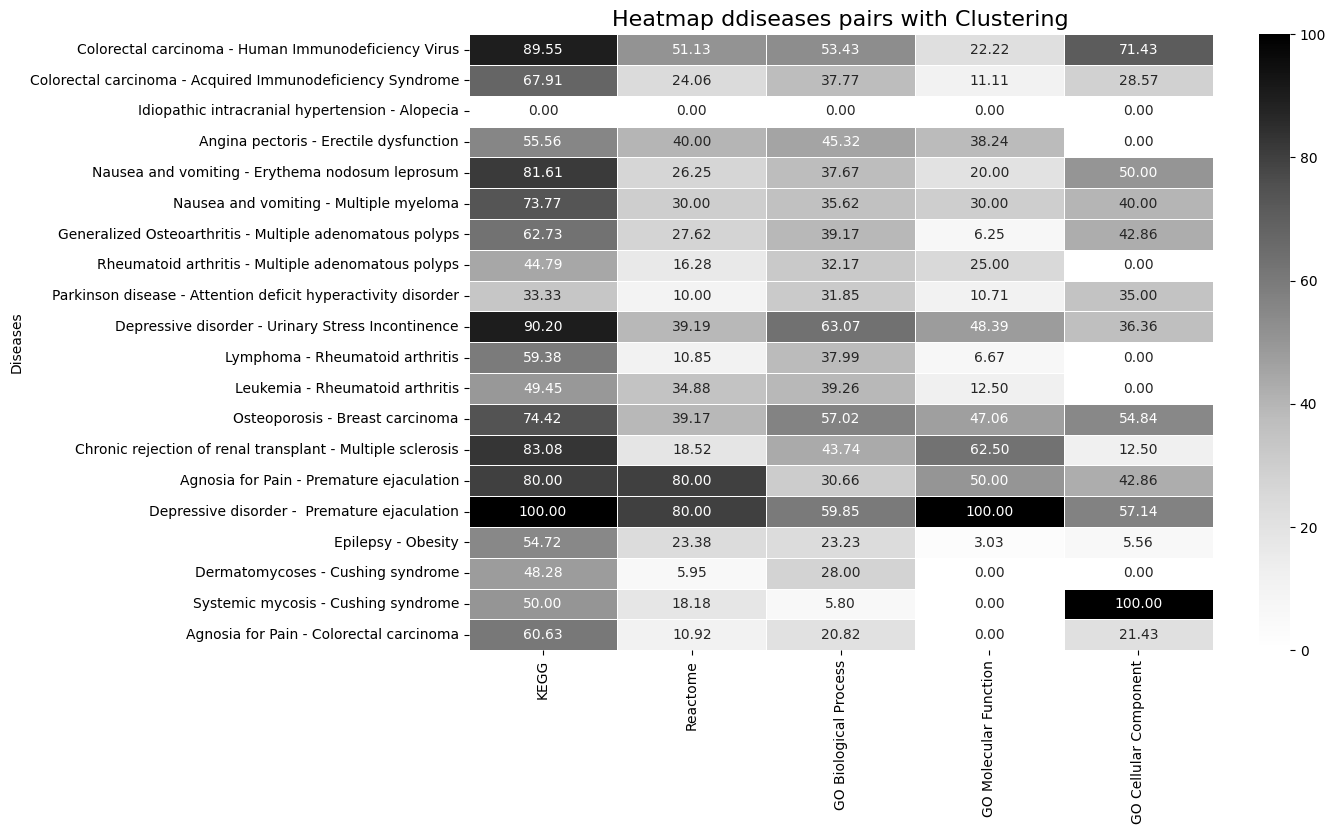

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definisci le dimensioni della figura
plt.figure(figsize=(12, 8))

# Crea la heatmap con i valori delle colonne normalizzate
sns.heatmap(df[['KEGG', 'Reactome', 'GO Biological Process', 'GO Molecular Function', 'GO Cellular Component']], cmap='Greys', annot=True, fmt=".2f", linewidths=.5)

# Aggiungi un titolo
plt.title('Heatmap ddiseases pairs with Clustering', fontsize=16)

# Mostra la heatmap
plt.show()

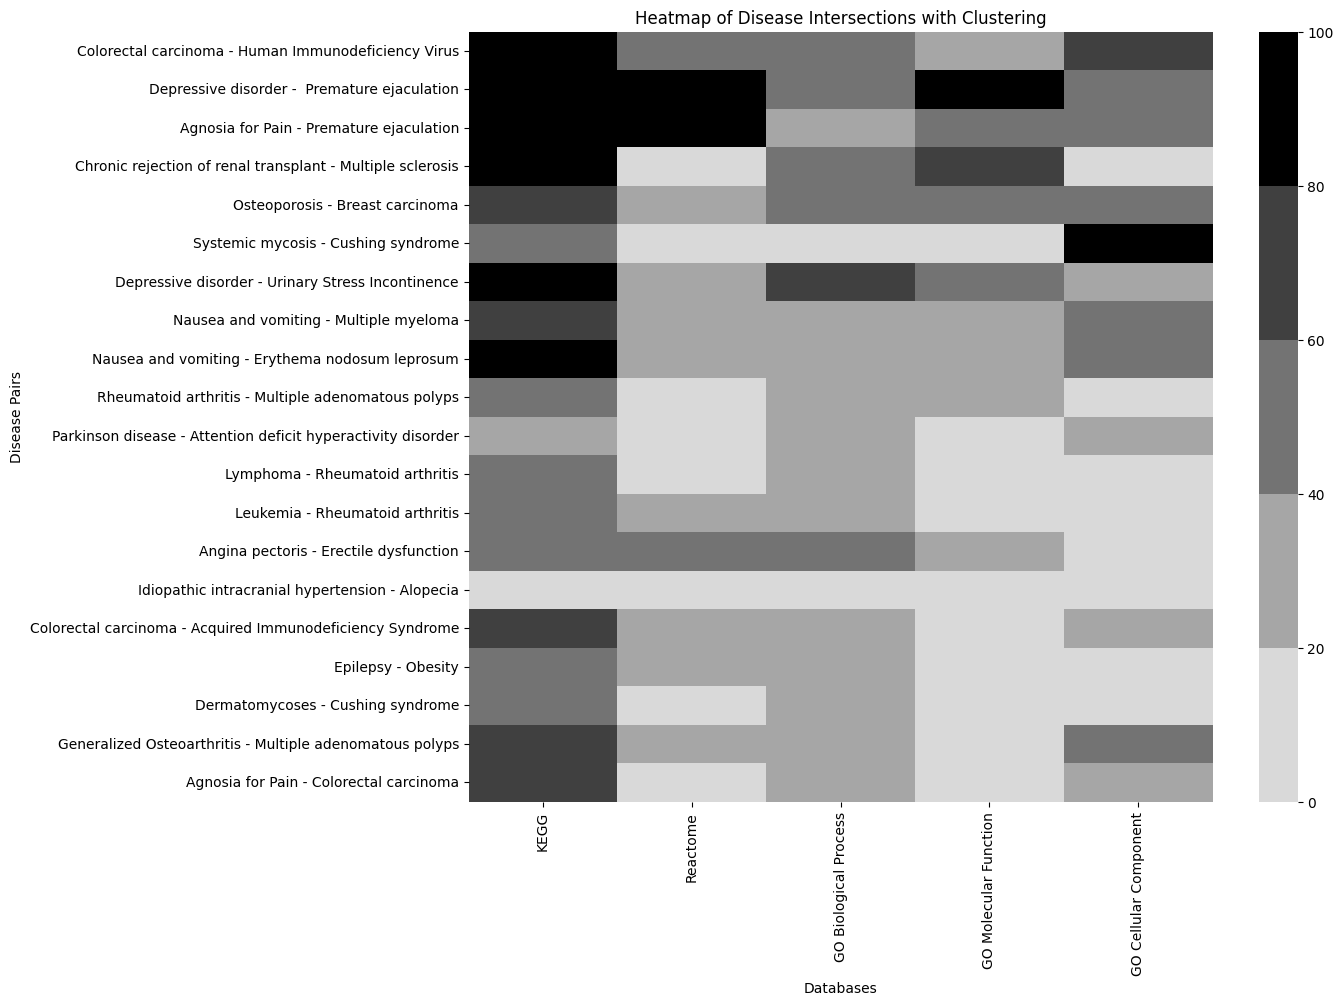

In [28]:

# Ordina i dati per cluster
df_sorted = df.sort_values('Cluster')

# Percorso di base per salvare i risultati
base_path = "/Users/elisa/Desktop/Tesi/PROGETTO/Risultati_clustering/INTERSECTION_OVER_MIN/"
cluster_folder = f"K_MEANS_K_{optimal_k}"
full_path = os.path.join(base_path, cluster_folder)

# Crea la cartella se non esiste
os.makedirs(full_path, exist_ok=True)

# Creazione della Heatmap
plt.figure(figsize=(12, 10))
gray_palette = ['#d9d9d9', '#a6a6a6', '#737373', '#404040', '#000000']
sns.heatmap(df_sorted[['KEGG', 'Reactome', 'GO Biological Process', 'GO Molecular Function', 'GO Cellular Component']], 
            cmap=gray_palette, cbar=True)

plt.yticks(ticks=np.arange(df_sorted.shape[0]) + 0.5, labels=df_sorted.index, rotation=0)
plt.title('Heatmap of Disease Intersections with Clustering')
plt.xlabel('Databases')
plt.ylabel('Disease Pairs')

# Salva l'immagine della heatmap
output_file_path_heatmap = os.path.join(full_path, "Heatmap.png")
plt.savefig(output_file_path_heatmap, dpi=300, bbox_inches='tight')

# Mostra la heatmap
plt.show()



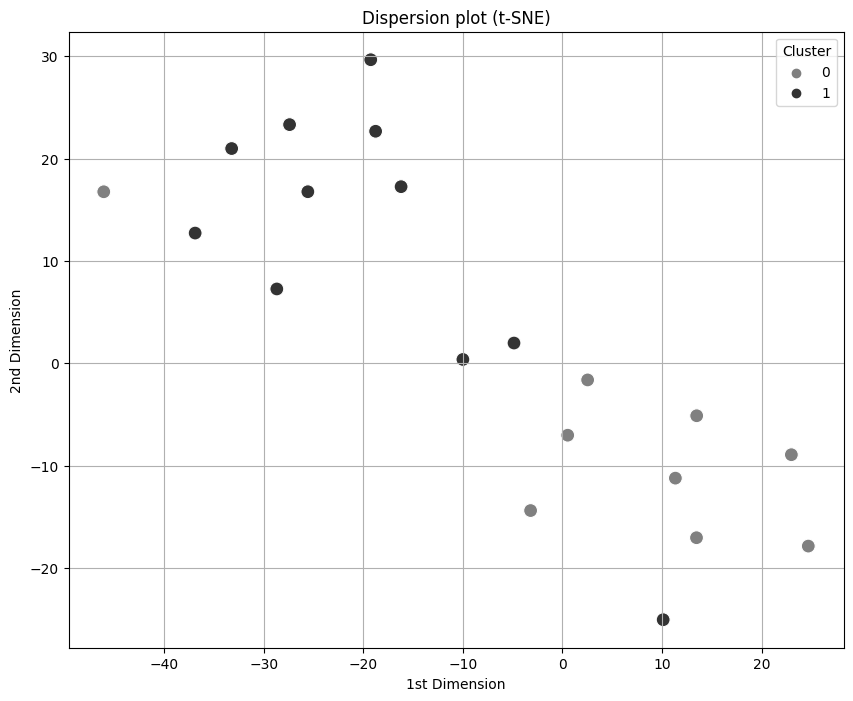

,Dimension1,Dimension2,Cluster
Diseases,,,
Colorectal carcinoma - Human Immunodeficiency Virus,13.473182,-5.118703,0
Colorectal carcinoma - Acquired Immunodeficiency Syndrome,-4.867713,1.983461,1
Idiopathic intracranial hypertension - Alopecia,-28.679794,7.266149,1
Angina pectoris - Erectile dysfunction,10.107781,-25.044004,1
Nausea and vomiting - Erythema nodosum leprosum,2.523461,-1.620019,0
Nausea and vomiting - Multiple myeloma,0.523399,-7.019492,0
Generalized Osteoarthritis - Multiple adenomatous polyps,-9.997544,0.380630,1
Rheumatoid arthritis - Multiple adenomatous polyps,-18.762121,22.672062,1
Parkinson disease - Attention deficit hyperactivity disorder,-36.881012,12.726803,1


In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Supponiamo che 'df' sia il tuo DataFrame con i dati e la colonna 'Cluster'
data_numeric = df.drop(columns=['Cluster'])  # Escludi la colonna Cluster
#scaler = StandardScaler()
#data_scaled = scaler.fit_transform(data_numeric)

# Esegui t-SNE per ridurre a 2 dimensioni
tsne = TSNE(n_components=2, perplexity=5, random_state=0)
data_tsne = tsne.fit_transform(data_scaled)

# Crea un DataFrame con i risultati di t-SNE
df_tsne = pd.DataFrame(data_tsne, columns=['Dimension1', 'Dimension2'], index=df.index)
df_tsne['Cluster'] = df['Cluster']

# Definisci una palette di colori grigi chiaro e scuro
palette = {0: '#808080', 1: '#333333'}

# Crea il grafico di dispersione
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimension1', y='Dimension2', hue='Cluster', data=df_tsne, palette=palette, s=100)
plt.title('Dispersion plot (t-SNE)')
plt.xlabel('1st Dimension')
plt.ylabel('2nd Dimension')
plt.grid(True)
plt.show()
df_tsne


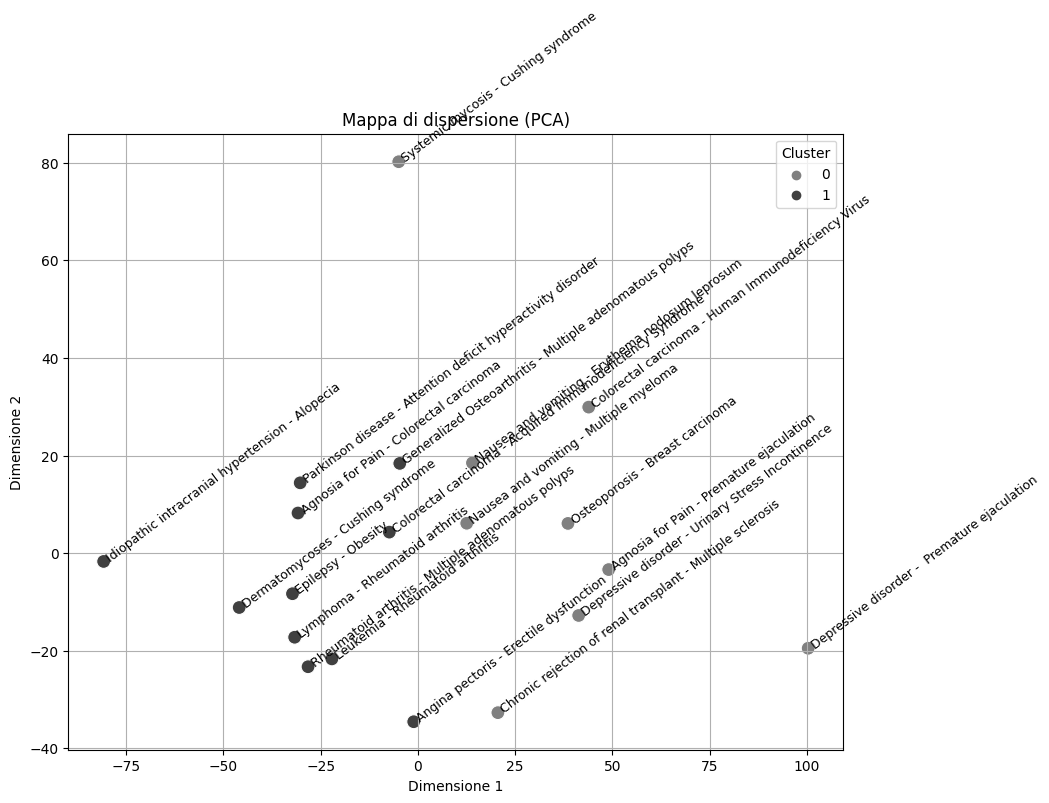

,Dimension1,Dimension2,Cluster
Diseases,,,
Colorectal carcinoma - Human Immunodeficiency Virus,43.890235,29.913305,0
Colorectal carcinoma - Acquired Immunodeficiency Syndrome,-7.356726,4.306888,1
Idiopathic intracranial hypertension - Alopecia,-80.783152,-1.699618,1
Angina pectoris - Erectile dysfunction,-1.085433,-34.529662,1
Nausea and vomiting - Erythema nodosum leprosum,14.010721,18.491248,0
Nausea and vomiting - Multiple myeloma,12.537102,6.125350,0
Generalized Osteoarthritis - Multiple adenomatous polyps,-4.667785,18.384113,1
Rheumatoid arthritis - Multiple adenomatous polyps,-28.242850,-23.265699,1
Parkinson disease - Attention deficit hyperactivity disorder,-30.267849,14.402071,1


In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import os

# Supponiamo che 'df' sia il tuo DataFrame con i dati e la colonna 'Cluster'
data_numeric = df.drop(columns=['Cluster'])  # Escludi la colonna Cluster
#scaler = StandardScaler()
#data_scaled = scaler.fit_transform(data_numeric)

# Esegui PCA per ridurre a 2 dimensioni
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_numeric)

# Crea un DataFrame con i risultati di PCA
df_pca = pd.DataFrame(data_pca, columns=['Dimension1', 'Dimension2'], index=df.index)
df_pca['Cluster'] = df['Cluster']

# Definisci una palette di colori grigio medio e grigio scuro
palette = {0: '#808080', 1: '#404040'}

# Crea il grafico di dispersione
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimension1', y='Dimension2', hue='Cluster', data=df_pca, palette=palette, s=100)
for i, disease in enumerate(df_pca.index):
    plt.text(df_pca['Dimension1'][i] + 0.20, df_pca['Dimension2'][i], disease, fontsize=9, rotation=37)
plt.title('Mappa di dispersione (PCA)')
plt.xlabel('Dimensione 1')
plt.ylabel('Dimensione 2')
plt.grid(True)
plt.show()

df_pca


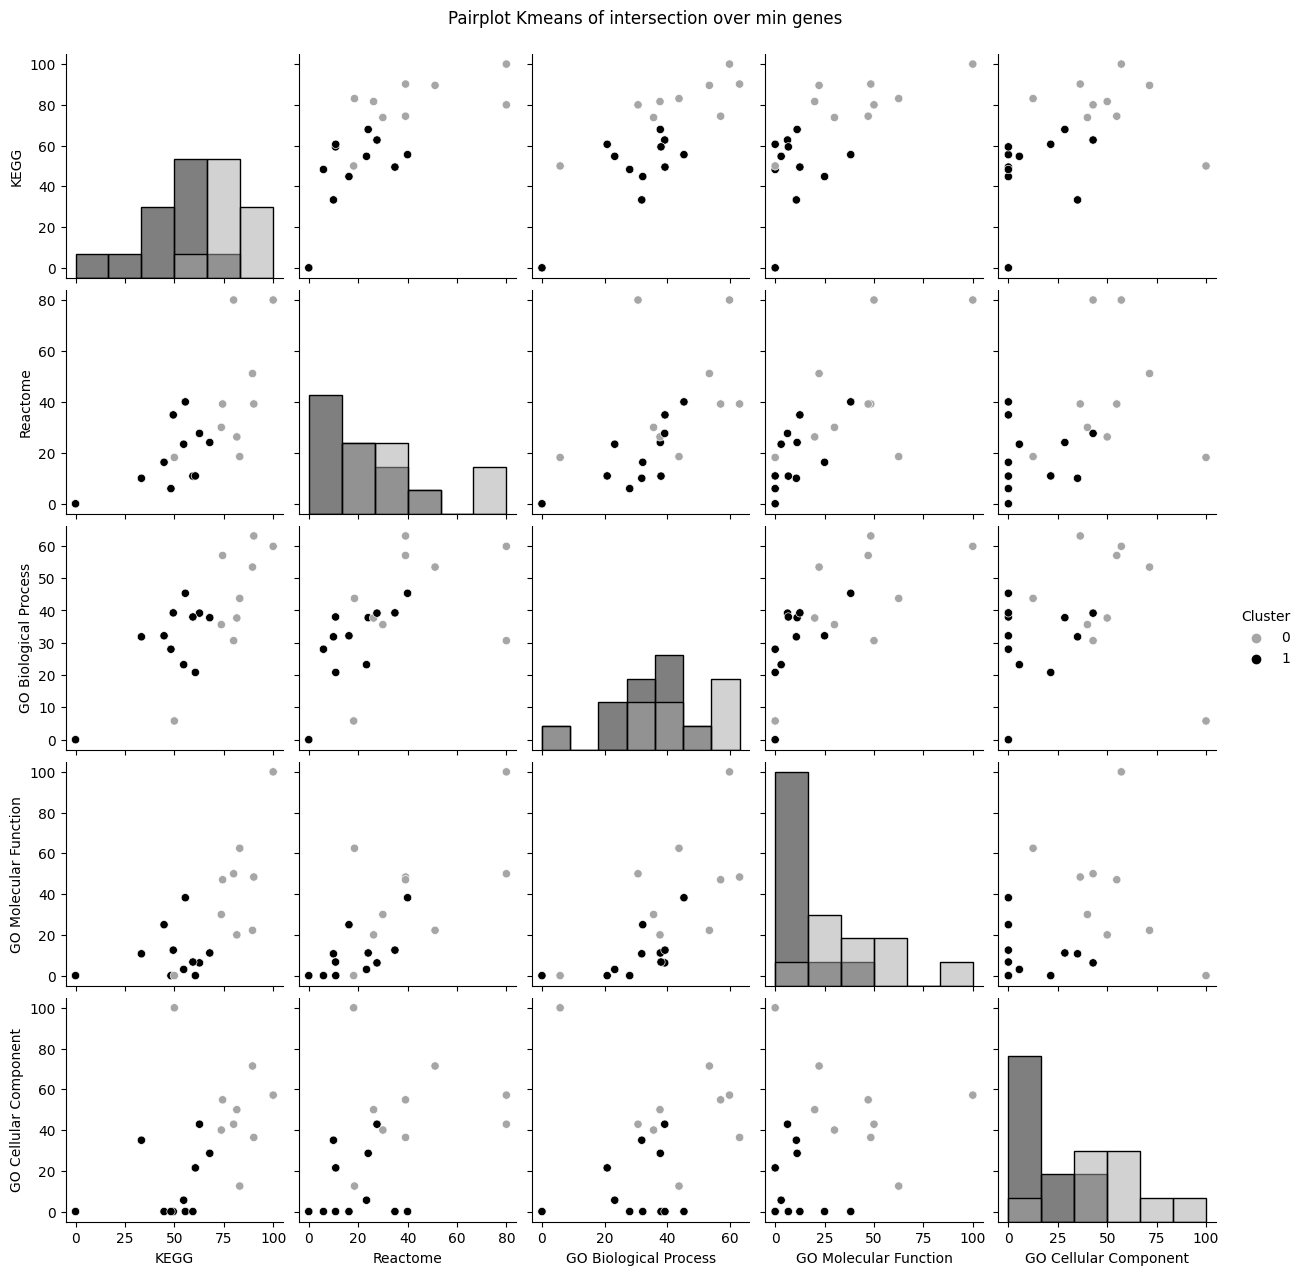

In [42]:
# Percorso di base per salvare i risultati
base_path = "/Users/elisa/Desktop/Tesi/PROGETTO/Risultati_clustering/INTERSECTION_OVER_MIN/"
cluster_folder = f"K_MEANS_K_{optimal_k}"
full_path = os.path.join(base_path, cluster_folder)

# Crea la cartella se non esiste
os.makedirs(full_path, exist_ok=True)

# Pairplot of intersection over min ratios
gray_palette = ['#a6a6a6', '#000000']
sns.pairplot(df, vars=['KEGG', 'Reactome', 'GO Biological Process', 'GO Molecular Function', 'GO Cellular Component',], 
             hue='Cluster', palette=gray_palette, diag_kind='hist')
plt.suptitle('Pairplot Kmeans of intersection over min genes', y=1.02)

# Salva il pairplot
output_file_path_pairplot = os.path.join(full_path, "Pairplot.png")
plt.savefig(output_file_path_pairplot, dpi=300, bbox_inches='tight')

# Mostra il pairplot
plt.show()

## Comaparation between the separation measure and the previous table


## The first part of the Topological analysis, can be found in the file "PE_project_elisa.ipynb"

In [100]:
# take just the column of the intersection over min
kegg_min = kegg[['Intersection over min % OD ∩ RD']].rename(columns={"Intersection over min % OD ∩ RD": "KEGG"})
reactome_min = reactome[['Intersection over min % OD ∩ RD']].rename(columns={"Intersection over min % OD ∩ RD": "Reactome"})
go_bp_min = go_bp[['Intersection over min % OD ∩ RD']].rename(columns={"Intersection over min % OD ∩ RD": "GO Biological Process"})
go_mf_min= go_mf[['Intersection over min % OD ∩ RD']].rename(columns={"Intersection over min % OD ∩ RD": "GO Molecular Function"})
go_cc_min = go_cc[['Intersection over min % OD ∩ RD']].rename(columns={"Intersection over min % OD ∩ RD": "GO Cellular Component"})


#upload Disease Disease file
disease_disease = pd.read_excel("/Users/elisa/Desktop/Tesi/PROGETTO/Disease_Disease_summary.xlsx")

# Concatena tutti i DataFrame
df = pd.concat([kegg_min, reactome_min, go_bp_min, go_mf_min, go_cc_min], axis=1)

df.index = disease_disease['Disease - Disease']

#rename the index column 
df.index.name = 'Diseases'

df

,KEGG,Reactome,GO Biological Process,GO Molecular Function,GO Cellular Component
Diseases,,,,,
Colorectal carcinoma - Human Immunodeficiency Virus,89.552239,51.127820,53.433476,22.222222,71.428571
Colorectal carcinoma - Acquired Immunodeficiency Syndrome,67.910448,24.060150,37.768240,11.111111,28.571429
Idiopathic intracranial hypertension - Alopecia,0.000000,0.000000,0.000000,0.000000,0.000000
Angina pectoris - Erectile dysfunction,55.555556,40.000000,45.316456,38.235294,0.000000
Nausea and vomiting - Erythema nodosum leprosum,81.609195,26.250000,37.668161,20.000000,50.000000
Nausea and vomiting - Multiple myeloma,73.770492,30.000000,35.625000,30.000000,40.000000
Generalized Osteoarthritis - Multiple adenomatous polyps,62.727273,27.619048,39.171975,6.250000,42.857143
Rheumatoid arthritis - Multiple adenomatous polyps,44.791667,16.279070,32.165605,25.000000,0.000000
Parkinson disease - Attention deficit hyperactivity disorder,33.333333,10.000000,31.847134,10.714286,35.000000


In [101]:
df_reset = df.reset_index()
df_reset

,Diseases,KEGG,Reactome,GO Biological Process,GO Molecular Function,GO Cellular Component
0,Colorectal carcinoma - Human Immunodeficiency ...,89.552239,51.127820,53.433476,22.222222,71.428571
1,Colorectal carcinoma - Acquired Immunodeficien...,67.910448,24.060150,37.768240,11.111111,28.571429
2,Idiopathic intracranial hypertension - Alopecia,0.000000,0.000000,0.000000,0.000000,0.000000
3,Angina pectoris - Erectile dysfunction,55.555556,40.000000,45.316456,38.235294,0.000000
4,Nausea and vomiting - Erythema nodosum leprosum,81.609195,26.250000,37.668161,20.000000,50.000000
5,Nausea and vomiting - Multiple myeloma,73.770492,30.000000,35.625000,30.000000,40.000000
6,Generalized Osteoarthritis - Multiple adenomat...,62.727273,27.619048,39.171975,6.250000,42.857143
7,Rheumatoid arthritis - Multiple adenomatous po...,44.791667,16.279070,32.165605,25.000000,0.000000
8,Parkinson disease - Attention deficit hyperact...,33.333333,10.000000,31.847134,10.714286,35.000000
9,Depressive disorder - Urinary Stress Incontinence,90.196078,39.189189,63.072776,48.387097,36.363636


In [102]:
separation_data_path = "/Users/elisa/Desktop/Tesi/Progetto/Disease_Modules_Separation.xlsx"
df_separation = pd.read_excel(separation_data_path)

In [103]:
df_separation['Disease 2'] = df_separation['Disease 2'].replace('Pseudotumor Cerebri', 'Idiopathic intracranial hypertension')

df_separation = pd.DataFrame({
    'Disease 1': ["Colorectal carcinoma",
    "Colorectal carcinoma",
    "Idiopathic intracranial hypertension",
    "Angina pectoris",
    "Nausea and vomiting",
    "Nausea and vomiting",
    "Generalized Osteoarthritis",
    "Rheumatoid arthritis",
    "Parkinson disease",
    "Depressive disorder",
    "Lymphoma",
    "Leukemia",
    "Osteoporosis",
    "Chronic rejection of renal transplant",
    "Agnosia for Pain",
    "Depressive disorder",
    "Epilepsy",
    "Dermatomycoses",
    "Systemic mycosis",
    "Agnosia for Pain"],

    
    'Disease 2': ["Human Immunodeficiency Virus",
    "Acquired Immunodeficiency Syndrome",
    "Alopecia",
    "Erectile dysfunction",
    "Erythema nodosum leprosum",
    "Multiple myeloma",
    "Multiple adenomatous polyps",
    "Multiple adenomatous polyps",
    "Attention deficit hyperactivity disorder",
    "Urinary Stress Incontinence",
    "Rheumatoid arthritis",
    "Rheumatoid arthritis",
    "Breast carcinoma",
    "Multiple sclerosis",
    "Premature ejaculation",
    "Premature ejaculation",
    "Obesity",
    "Cushing syndrome",
    "Cushing syndrome",
    "Colorectal carcinoma"],
    's_AB in PPI': [0.006424, 0.012043, 0.029552, 0.050203, 0.049956, 0.006509, 0.025462, 0.026393, 0.018845, 0.030946, 0.004272, 
                    0.017594, 0.006915, 0.044379, -0.014970, -0.000687, 0.008055, -0.024242, 0.058815, 0.019250],
    's_AB in FI': [0.021787, 0.038213, -0.098765, 0.095766, 0.076307, 0.039211, 0.040536, 0.064075, 0.190720, 0.084072, 
                   0.026559, 0.102770, 0.033762, 0.010431, -0.029855, -0.015515, 0.052870, 0.030989, -0.102639, 0.101731]
})
df_separation = pd.DataFrame(df_separation)


In [104]:
df_separation['Diseases'] = df_separation['Disease 1'] + ' - ' + df_separation['Disease 2']
df_separation = df_separation[['Diseases'] + [col for col in df_separation.columns if col not in ['Diseases', 'Disease 1', 'Disease 2']]]
# save it to excel
df_separation.to_excel("/Users/elisa/Desktop/Tesi/PROGETTO/Disease_Modules_Separation_corrected.xlsx", index=False)
df_separation

,Diseases,s_AB in PPI,s_AB in FI
0,Colorectal carcinoma - Human Immunodeficiency ...,0.006424,0.021787
1,Colorectal carcinoma - Acquired Immunodeficien...,0.012043,0.038213
2,Idiopathic intracranial hypertension - Alopecia,0.029552,-0.098765
3,Angina pectoris - Erectile dysfunction,0.050203,0.095766
4,Nausea and vomiting - Erythema nodosum leprosum,0.049956,0.076307
5,Nausea and vomiting - Multiple myeloma,0.006509,0.039211
6,Generalized Osteoarthritis - Multiple adenomat...,0.025462,0.040536
7,Rheumatoid arthritis - Multiple adenomatous po...,0.026393,0.064075
8,Parkinson disease - Attention deficit hyperact...,0.018845,0.190720
9,Depressive disorder - Urinary Stress Incontinence,0.030946,0.084072


In [105]:
df_reset['Diseases'] = df_reset['Diseases'].str.strip().str.lower()
df_separation['Diseases'] = df_separation['Diseases'].str.strip().str.lower()
df_reset['Diseases'] = df_reset['Diseases'].str.strip().str.replace('  ', ' ')
df_separation['Diseases'] = df_separation['Diseases'].str.strip()

In [106]:
merged_df = pd.merge(df_reset, df_separation[['Diseases', 's_AB in PPI', 's_AB in FI']], on='Diseases', how='left')

merged_df

,Diseases,KEGG,Reactome,GO Biological Process,GO Molecular Function,GO Cellular Component,s_AB in PPI,s_AB in FI
0,colorectal carcinoma - human immunodeficiency ...,89.552239,51.127820,53.433476,22.222222,71.428571,0.006424,0.021787
1,colorectal carcinoma - acquired immunodeficien...,67.910448,24.060150,37.768240,11.111111,28.571429,0.012043,0.038213
2,idiopathic intracranial hypertension - alopecia,0.000000,0.000000,0.000000,0.000000,0.000000,0.029552,-0.098765
3,angina pectoris - erectile dysfunction,55.555556,40.000000,45.316456,38.235294,0.000000,0.050203,0.095766
4,nausea and vomiting - erythema nodosum leprosum,81.609195,26.250000,37.668161,20.000000,50.000000,0.049956,0.076307
5,nausea and vomiting - multiple myeloma,73.770492,30.000000,35.625000,30.000000,40.000000,0.006509,0.039211
6,generalized osteoarthritis - multiple adenomat...,62.727273,27.619048,39.171975,6.250000,42.857143,0.025462,0.040536
7,rheumatoid arthritis - multiple adenomatous po...,44.791667,16.279070,32.165605,25.000000,0.000000,0.026393,0.064075
8,parkinson disease - attention deficit hyperact...,33.333333,10.000000,31.847134,10.714286,35.000000,0.018845,0.190720
9,depressive disorder - urinary stress incontinence,90.196078,39.189189,63.072776,48.387097,36.363636,0.030946,0.084072


In [107]:
merged_df.set_index('Diseases', inplace=True)

In [108]:
# normalize merged_df
from sklearn.preprocessing import MinMaxScaler

# Creiamo un oggetto scaler per la normalizzazione min-max
scaler = MinMaxScaler()

# Selezioniamo tutte le colonne tranne 'Diseases' per la normalizzazione
columns_to_normalize = merged_df.columns.difference(['Diseases'])

# Applichiamo lo scaler solo alle colonne selezionate
merged_df[columns_to_normalize] = scaler.fit_transform(merged_df[columns_to_normalize])



merged_df = pd.DataFrame(merged_df)



In [109]:
merged_df

,KEGG,Reactome,GO Biological Process,GO Molecular Function,GO Cellular Component,s_AB in PPI,s_AB in FI
Diseases,,,,,,,
colorectal carcinoma - human immunodeficiency virus,0.895522,0.639098,0.847172,0.222222,0.714286,0.369216,0.424142
colorectal carcinoma - acquired immunodeficiency syndrome,0.679104,0.300752,0.598804,0.111111,0.285714,0.436869,0.480135
idiopathic intracranial hypertension - alopecia,0.000000,0.000000,0.000000,0.000000,0.000000,0.647676,0.013206
angina pectoris - erectile dysfunction,0.555556,0.500000,0.718479,0.382353,0.000000,0.896312,0.676322
nausea and vomiting - erythema nodosum leprosum,0.816092,0.328125,0.597217,0.200000,0.500000,0.893338,0.609990
nausea and vomiting - multiple myeloma,0.737705,0.375000,0.564824,0.300000,0.400000,0.370240,0.483537
generalized osteoarthritis - multiple adenomatous polyps,0.627273,0.345238,0.621060,0.062500,0.428571,0.598432,0.488054
rheumatoid arthritis - multiple adenomatous polyps,0.447917,0.203488,0.509976,0.250000,0.000000,0.609642,0.568293
parkinson disease - attention deficit hyperactivity disorder,0.333333,0.125000,0.504927,0.107143,0.350000,0.518764,1.000000


/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


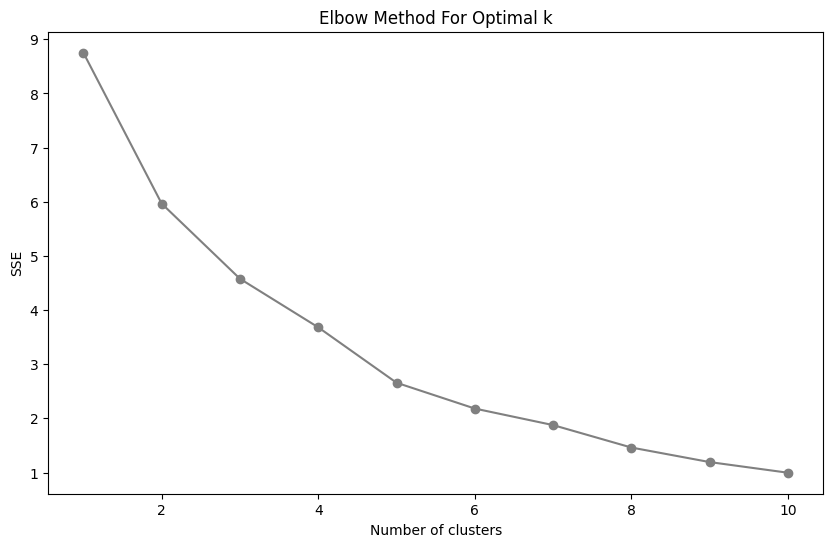

In [110]:
# perform the clustering wuth the df obtained with all the columns

# relevant columns for clustering
data_numeric = merged_df[['KEGG', 'Reactome', 'GO Biological Process', 'GO Molecular Function', 'GO Cellular Component', 's_AB in PPI', 's_AB in FI']]
# Determina il numero ottimale di cluster
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_numeric)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o', color ="gray")
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


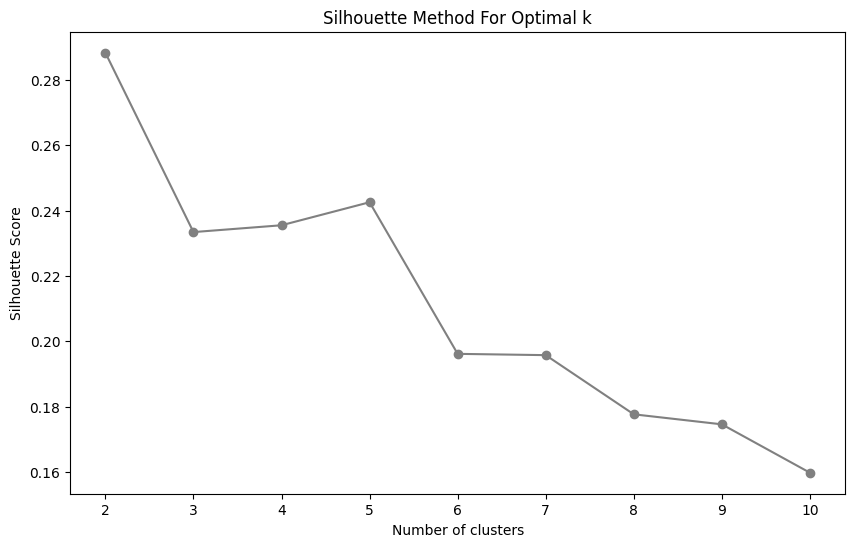

In [112]:
silhouette_scores = []
K = range(2, 11) 

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_numeric)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(data_numeric, labels))

# Traccia il metodo della silhouette
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, marker='o', color ="gray")
plt.title('Silhouette Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [113]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [114]:
# Numero ottimale di cluster
optimal_k = 2

# Esegui il clustering con KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
merged_df['Cluster'] = kmeans.fit_predict(merged_df[columns_to_normalize])

merged_df

/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,KEGG,Reactome,GO Biological Process,GO Molecular Function,GO Cellular Component,s_AB in PPI,s_AB in FI,Cluster
Diseases,,,,,,,,
colorectal carcinoma - human immunodeficiency virus,0.895522,0.639098,0.847172,0.222222,0.714286,0.369216,0.424142,1
colorectal carcinoma - acquired immunodeficiency syndrome,0.679104,0.300752,0.598804,0.111111,0.285714,0.436869,0.480135,0
idiopathic intracranial hypertension - alopecia,0.000000,0.000000,0.000000,0.000000,0.000000,0.647676,0.013206,0
angina pectoris - erectile dysfunction,0.555556,0.500000,0.718479,0.382353,0.000000,0.896312,0.676322,0
nausea and vomiting - erythema nodosum leprosum,0.816092,0.328125,0.597217,0.200000,0.500000,0.893338,0.609990,0
nausea and vomiting - multiple myeloma,0.737705,0.375000,0.564824,0.300000,0.400000,0.370240,0.483537,0
generalized osteoarthritis - multiple adenomatous polyps,0.627273,0.345238,0.621060,0.062500,0.428571,0.598432,0.488054,0
rheumatoid arthritis - multiple adenomatous polyps,0.447917,0.203488,0.509976,0.250000,0.000000,0.609642,0.568293,0
parkinson disease - attention deficit hyperactivity disorder,0.333333,0.125000,0.504927,0.107143,0.350000,0.518764,1.000000,0


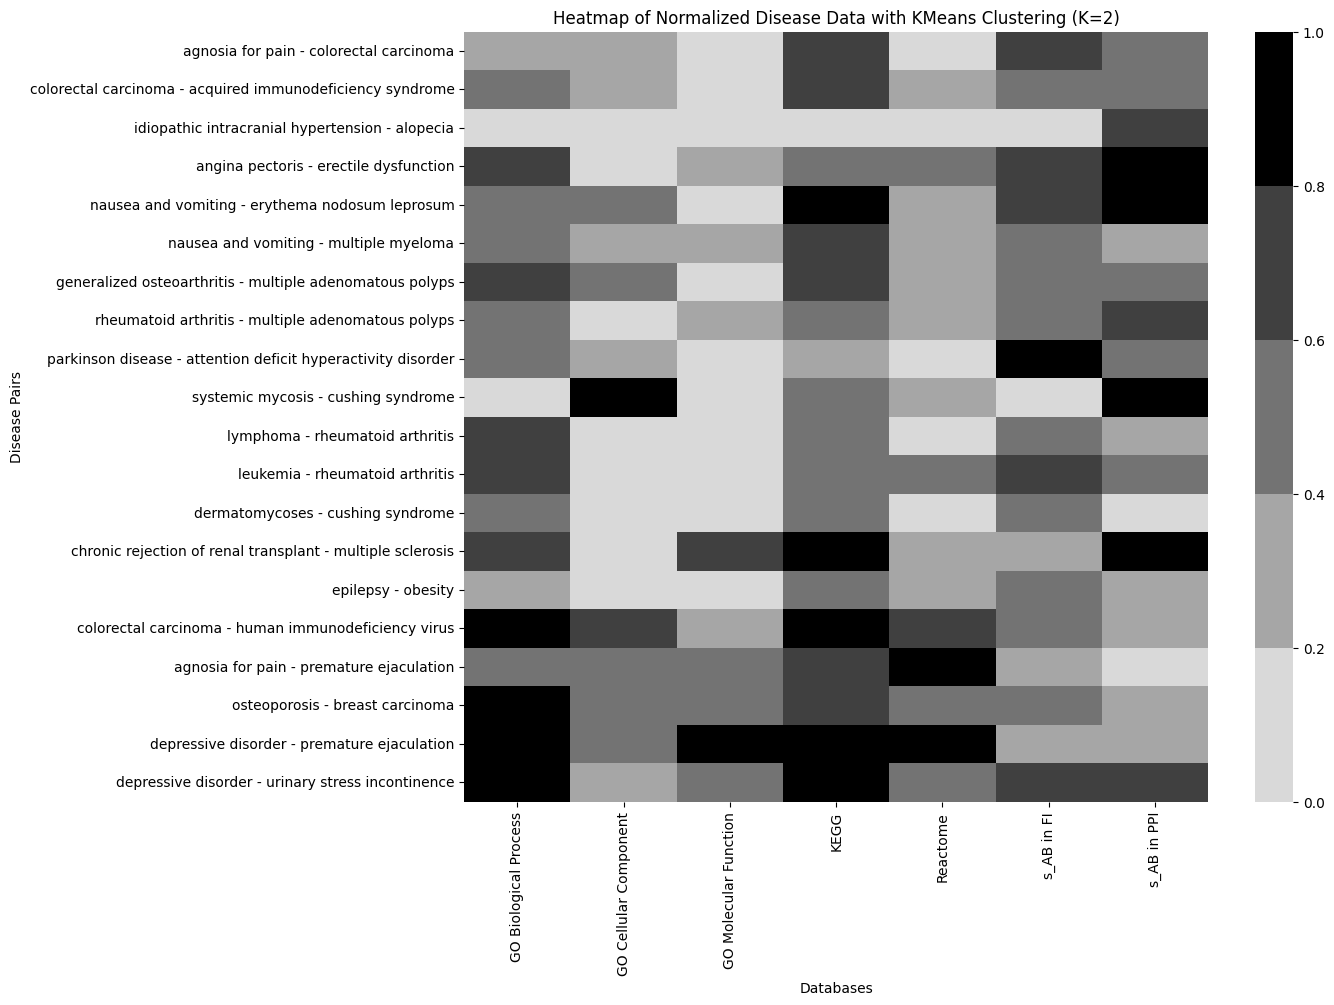

In [115]:
# Ordina il DataFrame in base ai cluster per migliorare la visualizzazione nella heatmap
merged_df_sorted = merged_df.sort_values('Cluster')

# Percorso di base per salvare i risultati
#base_path = "/Users/elisa/Desktop/Tesi/PROGETTO/Risultati_clustering/INTERSECTION_OVER_MIN/"
#cluster_folder = f"K_MEANS_K_{optimal_k}"
#full_path = os.path.join(base_path, cluster_folder)

# Crea la cartella se non esiste
#os.makedirs(full_path, exist_ok=True)
merged_df_sorted


plt.figure(figsize=(12, 10))
gray_palette = ['#d9d9d9', '#a6a6a6', '#737373', '#404040', '#000000']
sns.heatmap(merged_df_sorted[columns_to_normalize], cmap=gray_palette, cbar=True)

# Configura le etichette dell'asse Y per mostrare le coppie di malattie
plt.yticks(ticks=np.arange(merged_df_sorted.shape[0]) + 0.5, labels=merged_df_sorted.index, rotation=0)

# Imposta il titolo e le etichette degli assi
plt.title('Heatmap of Normalized Disease Data with KMeans Clustering (K=2)')
plt.xlabel('Databases')
plt.ylabel('Disease Pairs')

# Percorso del file per salvare l'immagine della heatmap
#output_file_path_heatmap = os.path.join(full_path, "Heatmap_Normalized_KMeans_K2.png")
#plt.savefig(output_file_path_heatmap, dpi=300, bbox_inches='tight')

# Mostra la heatmap
plt.show()



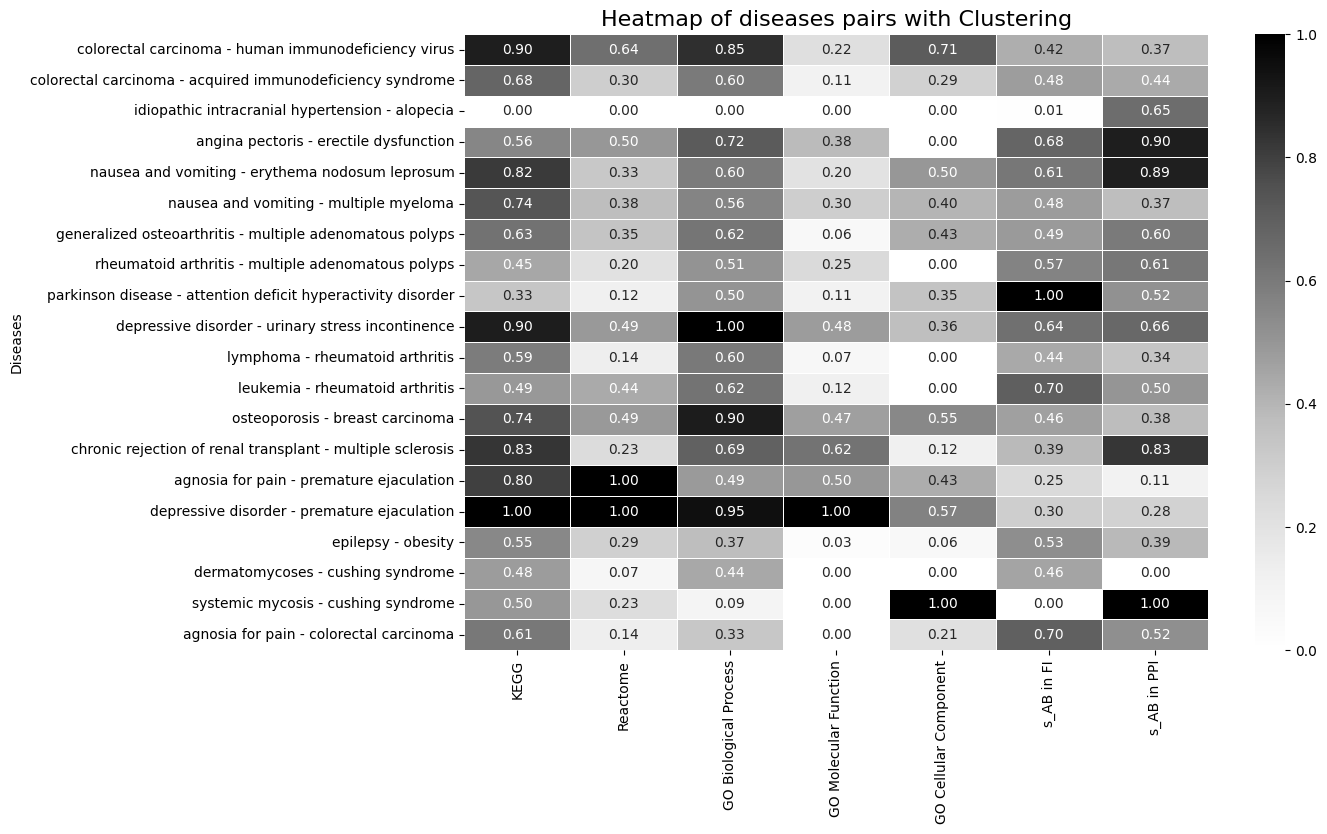

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definisci le dimensioni della figura
plt.figure(figsize=(12, 8))

# Crea la heatmap con i valori delle colonne normalizzate
sns.heatmap(merged_df[['KEGG', 'Reactome', 'GO Biological Process', 'GO Molecular Function', 'GO Cellular Component','s_AB in FI', 's_AB in PPI']], cmap='Greys', annot=True, fmt=".2f", linewidths=.5)

# Aggiungi un titolo
plt.title('Heatmap of diseases pairs with Clustering', fontsize=16)

# Mostra la heatmap
plt.show()


In [117]:
data_numeric = merged_df[['KEGG', 'Reactome', 'GO Biological Process', 'GO Molecular Function', 'GO Cellular Component', 's_AB in PPI', 's_AB in FI']]

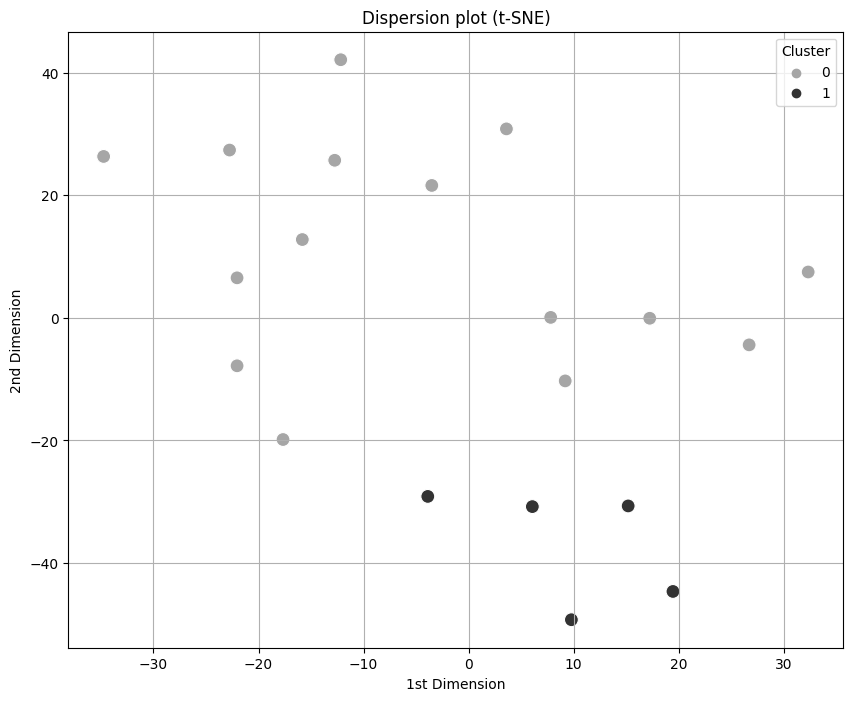

,Dimension1,Dimension2,Cluster
Diseases,,,
colorectal carcinoma - human immunodeficiency virus,15.184705,-30.690311,1
colorectal carcinoma - acquired immunodeficiency syndrome,7.811452,0.071217,0
idiopathic intracranial hypertension - alopecia,-12.174226,42.114132,0
angina pectoris - erectile dysfunction,-22.043032,-7.826841,0
nausea and vomiting - erythema nodosum leprosum,26.698706,-4.412253,0
nausea and vomiting - multiple myeloma,9.191021,-10.291203,0
generalized osteoarthritis - multiple adenomatous polyps,17.238905,-0.068726,0
rheumatoid arthritis - multiple adenomatous polyps,-15.831279,12.774995,0
parkinson disease - attention deficit hyperactivity disorder,-34.744923,26.332348,0


In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
# Supponiamo che 'merged_df' sia il tuo DataFrame già normalizzato e senza la colonna 'Cluster'
data_numeric = merged_df.drop(columns=['Cluster'])  # Escludi la colonna Cluster

# Esegui t-SNE per ridurre i dati a 2 dimensioni sui dati già normalizzati
tsne = TSNE(n_components=2, perplexity=5, random_state=0)
data_tsne = tsne.fit_transform(data_numeric)

# Crea un DataFrame con i risultati di t-SNE
df_tsne = pd.DataFrame(data_tsne, columns=['Dimension1', 'Dimension2'], index=merged_df.index)
df_tsne['Cluster'] = merged_df['Cluster']

# Definisci una palette di colori grigi chiaro e scuro
palette = {0: '#a6a6a6', 1: '#333333'}

# Crea il grafico di dispersione (scatter plot)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimension1', y='Dimension2', hue='Cluster', data=df_tsne, palette=palette, s=100)
plt.title('Dispersion plot (t-SNE)')
plt.xlabel('1st Dimension')
plt.ylabel('2nd Dimension')
plt.grid(True)
plt.show()
df_tsne


In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from adjustText import adjust_text  # Importa la libreria adjustText
import os

In [167]:
#data_pca = pca.fit_transform(data_numeric)

# Crea un DataFrame con i risultati di PCA
# df_pca = pd.DataFrame(data_pca, columns=['Dimension1', 'Dimension2'], index=merged_df.index)
# df_pca['Cluster'] = merged_df['Cluster']

# # Definisci una palette di colori grigio medio e grigio scuro
# palette = {0: '#808080', 1: '#404040'}

# # Crea il grafico di dispersione
# plt.figure(figsize=(10, 8))
# sns.scatterplot(x='Dimension1', y='Dimension2', hue='Cluster', data=df_pca, palette=palette, s=100)
# for i, disease in enumerate(df_pca.index):
#     plt.text(df_pca['Dimension1'][i]+0.2, df_pca['Dimension2'][i]+0.2, 
#              disease, fontsize=9, rotation=45)
# plt.title('Mappa di dispersione (PCA)')
# plt.xlabel('Dimensione 1')
# plt.ylabel('Dimensione 2')
# plt.grid(True)
# plt.show()

# df_pca



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import adjustText as adjust_text  # Importa la libreria adjustText
import os